In [1]:
import pandas as pd
import numpy as np
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles
import matplotlib.pyplot as plt

In [2]:
our = pd.read_csv ('../OmniPath/L_R_OmniPathFull.csv', index_col=None)

In [3]:
#cellphone_db uses sql database with multiple tables, we export these tables into csv and re-organise the pairs
#into one df

#explained in /RestructureCPDB/BreakdownCPDB.ipynb

cpdb = pd.read_csv ('cpdb_original.csv', index_col=None)

In [4]:
nnet_lr = pd.read_csv ('lr_network.csv', index_col=None)

In [5]:
#create pairs in nnet
nnet_lr["pairs"]=nnet_lr["from"] + "_" + nnet_lr["to"]

In [6]:
#get unique list of pairs in Commpackage
our_pairs = set(our['Pair.Name'])

In [7]:
#get unique list of pairs in cpdb

cpdb_pairs = set(cpdb['pairs'])

In [8]:
#get unique list of pairs in nnet

nnet_pairs = set(nnet_lr['pairs'])

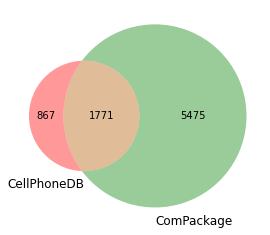

In [10]:
#plot pairs of CellPhoneDB vs ComPackage
venn2([cpdb_pairs, our_pairs], ('CellPhoneDB', 'ComPackage'))
plt.savefig('ComparisonFigures/cpdb-compackage.pdf')

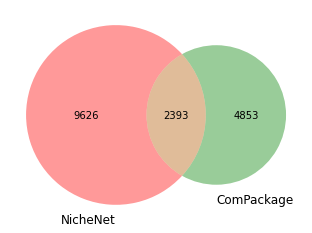

In [11]:
#plot pairs of NicheNet vs ComPackage
venn2([nnet_pairs, our_pairs], ('NicheNet', 'ComPackage'))
plt.savefig('ComparisonFigures/NicheNet-compackage.pdf')

In [12]:
#nnet predicted 10.629 pairs, lets see how does the comparison look without the predicted pairs
nnet_nopridcition=nnet_lr[~nnet_lr["database"].str.contains("ppi_")]

In [13]:
nopredict_pairs=set(nnet_nopridcition["pairs"])

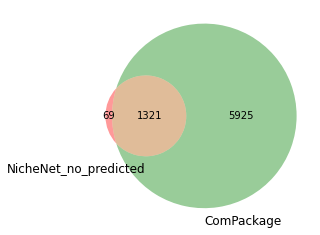

In [14]:
#plot pairs of NicheNet without predicted pairs vs ComPackage

venn2([nopredict_pairs, our_pairs], ('NicheNet_no_predicted', 'ComPackage'))
plt.savefig('ComparisonFigures/NicheNet_no_predicted-compackage.pdf')

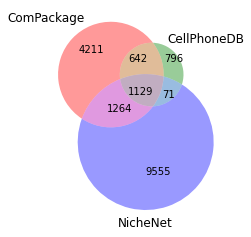

In [15]:
#plot pairs of 3 DBs in one

venn3([our_pairs,cpdb_pairs, nnet_pairs], ("ComPackage",'CellPhoneDB', 'NicheNet'))
plt.savefig('ComparisonFigures/3in1.pdf')

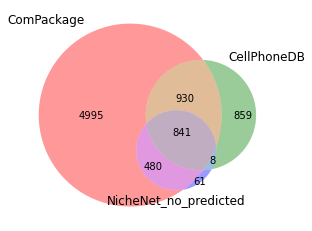

In [16]:
#plot pairs of 3 DBs in one, but in this one we do not include the predicted pairs for NicheNet
venn3([our_pairs,cpdb_pairs, nopredict_pairs], ("ComPackage",'CellPhoneDB', 'NicheNet_no_predicted'))
plt.savefig('ComparisonFigures/3in1_NoPredicted.pdf')